Importing necessary library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt




# Load the dataset

In [3]:

file_path = 'Youth_Tobacco.csv'
yts_data = pd.read_csv(file_path)

# Display the first few rows of the dataset

In [4]:
print("First few rows of the dataset:")
print(yts_data.head())

First few rows of the dataset:
   YEAR LocationAbbr   LocationDesc                  TopicType  \
0  2004           OH           Ohio  Tobacco Use – Survey Data   
1  2008           AL        Alabama  Tobacco Use – Survey Data   
2  2015           WV  West Virginia  Tobacco Use – Survey Data   
3  2005           IL       Illinois  Tobacco Use – Survey Data   
4  2005           CT    Connecticut  Tobacco Use – Survey Data   

                       TopicDesc     MeasureDesc DataSource  Response  \
0          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
1          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
2  Smokeless Tobacco Use (Youth)     User Status        YTS  Frequent   
3          Cigarette Use (Youth)  Smoking Status        YTS      Ever   
4  Smokeless Tobacco Use (Youth)     User Status        YTS      Ever   

  Data_Value_Unit Data_Value_Type  ...                    GeoLocation  \
0               %      Percentage  ...  (40.060210141, -82.4

checking shape

In [5]:

yts_data.shape

(10600, 31)

# Check for missing values

In [6]:

missing_values = yts_data.isnull().sum()
missing_values


YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       2410
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      520
Data_Value_Footnote_Symbol    10083
Data_Value_Footnote           10083
Data_Value_Std_Err              520
Low_Confidence_Limit            517
High_Confidence_Limit           520
Sample_Size                     520
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID3           

# Columns to check for missing values

In [7]:

columns_to_clean = ['GeoLocation', 'Data_Value', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size']

# Remove rows   have missing values
yts_data = yts_data.dropna(subset=columns_to_clean)


# Verify the cleaning by checking the shape or the sum of missing values

In [8]:


print(yts_data.shape)
print(yts_data.isnull().sum())


(10076, 31)
YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       1889
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                        0
Data_Value_Footnote_Symbol    10076
Data_Value_Footnote           10076
Data_Value_Std_Err                0
Low_Confidence_Limit              0
High_Confidence_Limit             0
Sample_Size                       0
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       0
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
StratificationID

dropping those two empty features

In [9]:
yts_data = yts_data.drop(columns=['Data_Value_Footnote_Symbol', 'Data_Value_Footnote'])

# Verify the columns are dropped

In [10]:
print(yts_data.columns)

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Std_Err',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'Gender', 'Race', 'Age', 'Education', 'GeoLocation', 'TopicTypeId',
       'TopicId', 'MeasureId', 'StratificationID1', 'StratificationID2',
       'StratificationID3', 'StratificationID4', 'SubMeasureID',
       'DisplayOrder'],
      dtype='object')


# Check for missing values

In [11]:
missing_values = yts_data.isnull().sum()
missing_values

YEAR                        0
LocationAbbr                0
LocationDesc                0
TopicType                   0
TopicDesc                   0
MeasureDesc                 0
DataSource                  0
Response                 1889
Data_Value_Unit             0
Data_Value_Type             0
Data_Value                  0
Data_Value_Std_Err          0
Low_Confidence_Limit        0
High_Confidence_Limit       0
Sample_Size                 0
Gender                      0
Race                        0
Age                         0
Education                   0
GeoLocation                 0
TopicTypeId                 0
TopicId                     0
MeasureId                   0
StratificationID1           0
StratificationID2           0
StratificationID3           0
StratificationID4           0
SubMeasureID                0
DisplayOrder                0
dtype: int64

filling missing value as unkowns in response feature

In [12]:
yts_data['Response'].fillna('Unknown', inplace=True)

/var/folders/9l/ybd9b8g910xgq507v8q5cgp00000gn/T/ipykernel_63674/29615011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  yts_data['Response'].fillna('Unknown', inplace=True)


rechecking for missing values

In [13]:
missing_values = yts_data.isnull().sum()
missing_values

YEAR                     0
LocationAbbr             0
LocationDesc             0
TopicType                0
TopicDesc                0
MeasureDesc              0
DataSource               0
Response                 0
Data_Value_Unit          0
Data_Value_Type          0
Data_Value               0
Data_Value_Std_Err       0
Low_Confidence_Limit     0
High_Confidence_Limit    0
Sample_Size              0
Gender                   0
Race                     0
Age                      0
Education                0
GeoLocation              0
TopicTypeId              0
TopicId                  0
MeasureId                0
StratificationID1        0
StratificationID2        0
StratificationID3        0
StratificationID4        0
SubMeasureID             0
DisplayOrder             0
dtype: int64

# Check for duplicate rows

In [14]:
duplicates = yts_data.duplicated().sum()
duplicates

0

# Display the structure of the dataset to understand available columns for aggregation

In [15]:
yts_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10076 entries, 0 to 10599
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   10076 non-null  int64  
 1   LocationAbbr           10076 non-null  object 
 2   LocationDesc           10076 non-null  object 
 3   TopicType              10076 non-null  object 
 4   TopicDesc              10076 non-null  object 
 5   MeasureDesc            10076 non-null  object 
 6   DataSource             10076 non-null  object 
 7   Response               10076 non-null  object 
 8   Data_Value_Unit        10076 non-null  object 
 9   Data_Value_Type        10076 non-null  object 
 10  Data_Value             10076 non-null  float64
 11  Data_Value_Std_Err     10076 non-null  float64
 12  Low_Confidence_Limit   10076 non-null  float64
 13  High_Confidence_Limit  10076 non-null  float64
 14  Sample_Size            10076 non-null  float64
 15  Gender 

## Summary statistics for numerical columns

# Display a summary to understand the numeric distribution,  for the tobacco use rate (Data_Value)

In [16]:
yts_data.describe()

,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,10076.000000,10076.000000,10076.000000,10076.000000,10076.000000,10076.000000,10076.000000
mean,2006.867705,20.319035,1.850973,16.703374,23.943132,1483.832572,8.343092
std,5.417412,21.153165,1.777582,18.559545,23.967822,2189.891960,2.945307
min,1999.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000
25%,2002.000000,3.000000,0.600000,1.700000,4.300000,671.000000,7.000000
50%,2006.000000,10.500000,1.300000,7.900000,13.200000,1001.500000,9.000000
75%,2011.000000,36.400000,2.400000,29.600000,42.325000,1642.000000,11.000000
max,2017.000000,98.000000,16.100000,97.600000,98.400000,36910.000000,12.000000


# Aggregate data by YEAR to get the average tobacco use rate per year

In [17]:
yearly_data = yts_data.groupby('YEAR')['Data_Value'].mean().reset_index()
yearly_data

,YEAR,Data_Value
0,1999,26.072849
1,2000,26.714642
2,2001,23.370000
3,2002,25.193280
4,2003,21.267216
5,2004,20.704131
6,2005,21.792195
7,2006,21.762874
8,2007,20.013158
9,2008,18.231670


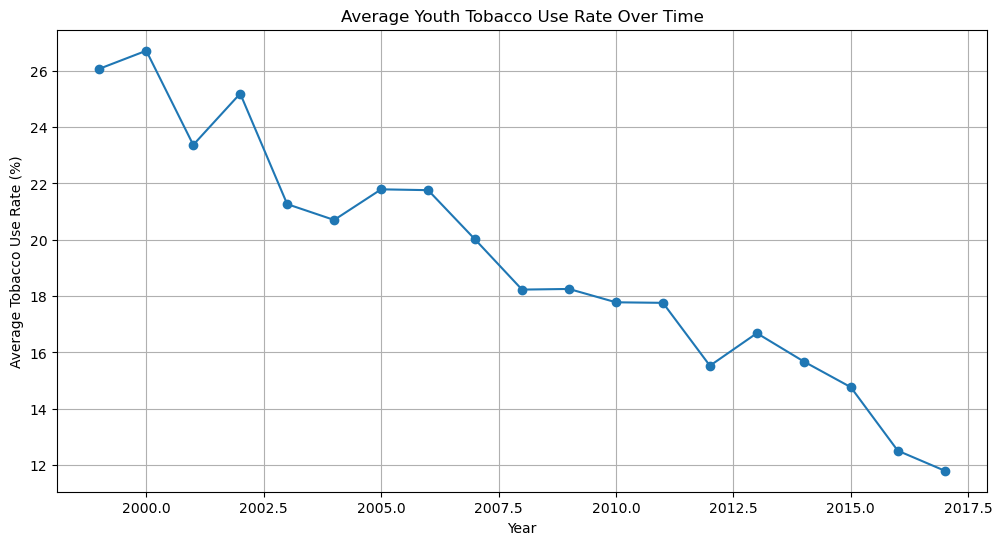

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(yearly_data['YEAR'], yearly_data['Data_Value'], marker='o', linestyle='-')
plt.title('Average Youth Tobacco Use Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Average Tobacco Use Rate (%)')
plt.grid(True)
plt.show()


The provided figure is a line graph representing the "Average Youth Tobacco Use Rate Over Time". It plots the average tobacco use rate (in percentage) among youth from around the year 1999 to  2018.

The starting point shows that in the year 2000, the average youth tobacco use rate was slightly above 26%.
There is a noticeable overall decline in the youth tobacco use rate over the 18-year period.
The most significant drop occurred between 2000 and 2004, where the rate fell from over 26% to around 22%.
After 2004, the decline continues but at a less steep rate.
Around 2015, the graph indicates another sharper decline, bringing the rate down to below 15%.
By the end of the period shown on the graph, the average youth tobacco use rate stands somewhere above 12%, indicating a rough halving of the rate since the year 2000.
The graph does not indicate the causes of the decline, but it suggests that whatever measures were in place to reduce tobacco use among youth during this period were having a positive effect. This could be due to a variety of factors such as increased awareness of health risks, public health campaigns, legislative actions (like raising the age limit for tobacco purchase), and changes in social attitudes towards smoking.

In [19]:
tobacoo_use_state_data = yts_data.groupby('LocationDesc')['Data_Value'].mean().reset_index()
tobacoo_use_state_data

,LocationDesc,Data_Value
0,Alabama,24.114563
1,Arizona,16.411066
2,Arkansas,26.044019
3,California,21.452083
4,Colorado,24.702174
5,Connecticut,15.933423
6,Delaware,17.906087
7,District of Columbia,19.827907
8,Florida,29.026042
9,Georgia,20.470990


In [20]:
# Calculate the average tobacco use by state
average_use_by_state = average_use_by_state.groupby('LocationDesc')['Data_Value'].mean().reset_index().sort_values(by='Data_Value', ascending=False)

# Plot the result
plt.figure(figsize=(14, 8))
plt.barh(average_use_by_state['LocationDesc'], average_use_by_state['Data_Value'], color='skyblue')
plt.title('Average Youth Tobacco Use by State', fontsize=14)
plt.xlabel('Average Tobacco Use (%)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()


NameError: name 'average_use_by_state' is not defined

The chart provides a visual comparison of average tobacco use among youth across different states. The length of each bar represents the average percentage of youth tobacco use in that state, with longer bars indicating higher usage

The chart shows a wide range of average tobacco use percentages among the states, indicating variability in how common tobacco use is among youth across the United States.

States at the top of the chart, like the Virgin Islands, Virginia, and Hawaii, have shorter bars, suggesting they have lower average youth tobacco use. In contrast, states at the bottom, such as Florida, Kentucky, and Tennessee, have the longest bars, indicating they have the highest average rates of tobacco use among youth.

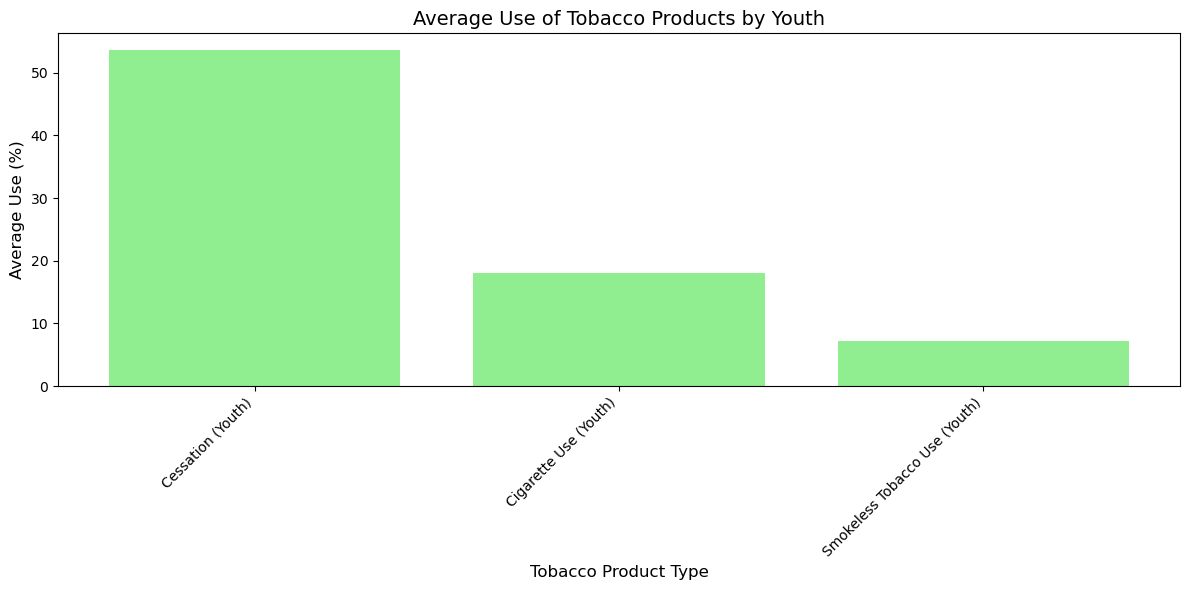

In [ ]:
# Calculate the average use percentage for each type of tobacco product
average_use_by_product = yts_data.groupby('TopicDesc')['Data_Value'].mean().reset_index().sort_values(by='Data_Value', ascending=False)

# Plot the result
plt.figure(figsize=(12, 6))
plt.bar(average_use_by_product['TopicDesc'], average_use_by_product['Data_Value'], color='lightgreen')
plt.title('Average Use of Tobacco Products by Youth', fontsize=14)
plt.xlabel('Tobacco Product Type', fontsize=12)
plt.ylabel('Average Use (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Cessation (Youth): This likely refers to the average rate at which youth are attempting to quit or reduce tobacco use. It's considerably higher than the use rates of actual tobacco products, which could indicate a strong interest or effort among youth to stop using tobacco.

Cigarette Use (Youth): This represents the average use percentage of cigarettes among youth. It is lower than the cessation rate, suggesting that while cigarette use is present, there is a greater tendency towards quitting.

Smokeless Tobacco Use (Youth): This shows the average use of smokeless tobacco products, which is the lowest among the three categories.

The chart provides insights into tobacco product usage behaviors among youth, highlighting that cessation efforts have a higher average percentage compared to actual usage of cigarette and smokeless tobacco. This could indicate effective public health messaging or tobacco control policies influencing youth behavior

## Corelation analysis

# Checking for other numerical columns that might be relevant for correlation analysis

In [ ]:
numerical_columns = yts_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the list of numerical columns

In [ ]:
numerical_columns

['YEAR',
 'Data_Value',
 'Data_Value_Std_Err',
 'Low_Confidence_Limit',
 'High_Confidence_Limit',
 'Sample_Size',
 'DisplayOrder']

In [ ]:
#standarlizing the column 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Data_Value', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
yts_data[numerical_cols] = scaler.fit_transform(yts_data[numerical_cols])

# Calculate the correlation matrix for the numerical columns

In [ ]:
correlation_matrix = yts_data[numerical_columns].corr()

# Display the correlation matrix focusing on 'Data_Value' correlations

In [ ]:
correlation_matrix['Data_Value']

YEAR                    -0.197978
Data_Value               1.000000
Data_Value_Std_Err       0.778063
Low_Confidence_Limit     0.993065
High_Confidence_Limit    0.995820
Sample_Size             -0.195556
DisplayOrder            -0.733275
Name: Data_Value, dtype: float64

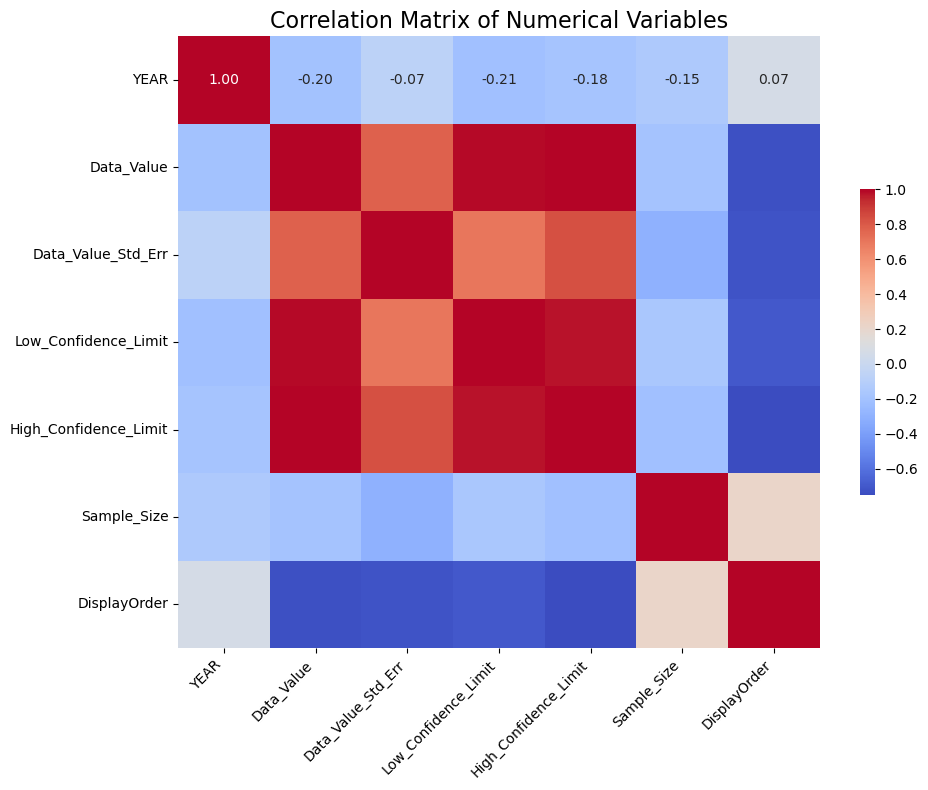

In [ ]:


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The heatmap visualizes the correlation matrix of numerical variables in the dataset, providing insights into how these variables relate to each other, particularly in relation to Data_Value, the percentage of youth tobacco use.

Key observations from the heatmap:

1.There's a slight negative correlation between YEAR and Data_Value, indicating a decrease in youth tobacco use over time.

2.High correlations between Data_Value and its low/high confidence limits suggest a strong relationship between the reported values and their confidence intervals.

3.The significant negative correlation between Data_Value and DisplayOrder is visible.

## Clustering tobacoo use rates according to geographic location

# Check for the presence of a suitable variable for tobacco use percentage and prepare for aggregation

In [ ]:
yts_data.columns

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Std_Err',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'Gender', 'Race', 'Age', 'Education', 'GeoLocation', 'TopicTypeId',
       'TopicId', 'MeasureId', 'StratificationID1', 'StratificationID2',
       'StratificationID3', 'StratificationID4', 'SubMeasureID',
       'DisplayOrder'],
      dtype='object')

# Aggregate Data_Value by LocationAbbr to get the mean percentage of tobacco use for each state

In [ ]:
state_tobacco_use = yts_data.groupby('LocationDesc')['Data_Value'].mean().reset_index()

# Display the aggregated data to verify

In [ ]:
state_tobacco_use.head()

,LocationDesc,Data_Value
0,Alabama,24.114563
1,Arizona,16.411066
2,Arkansas,26.044019
3,California,21.452083
4,Colorado,24.702174


In [ ]:
# specifying state with colour for visualiztion in Power BI

In [ ]:
def determine_color(data_value):
    if 20 <= data_value <= 30:
        return 'red'
    elif 10 <= data_value < 20:
        return 'blue'
    elif 0 <= data_value < 10:
        return 'yellow'
    else:
        return 'unknown'  

# Apply the function to the DataFrame to create the new 'color' column
state_tobacco_use['color'] = state_tobacco_use['Data_Value'].apply(determine_color)



In [ ]:
#saving the file

In [ ]:
state_tobacco_use.to_csv('state_tobacco_use_with_color.csv', index=False)


# Standardize the Data_Value

In [ ]:
scaler = StandardScaler()
state_tobacco_use_scaled = scaler.fit_transform(state_tobacco_use[['Data_Value']])

# Determine the optimal number of clusters using the Elbow Method

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

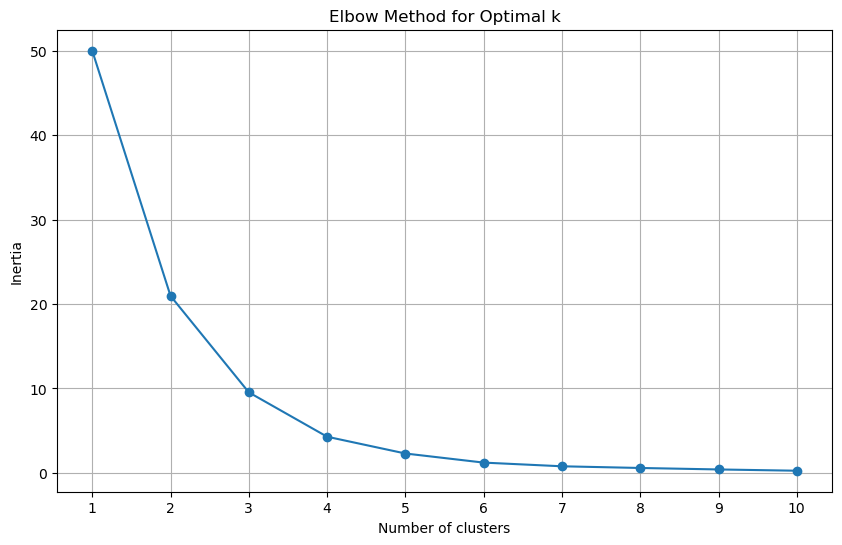

In [ ]:

inertia = []
k_range = range(1, 11)  # Test 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(state_tobacco_use_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Apply K-means clustering with 3 clusters

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
state_tobacco_use['Cluster'] = kmeans.fit_predict(state_tobacco_use_scaled)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Check the first few entries to see the cluster 

In [ ]:
state_tobacco_use.head()

,LocationDesc,Data_Value,color,Cluster
0,Alabama,24.114563,red,2
1,Arizona,16.411066,blue,0
2,Arkansas,26.044019,red,2
3,California,21.452083,red,0
4,Colorado,24.702174,red,2


# Calculate the mean Data_Value for each cluster

In [ ]:
cluster_means = state_tobacco_use.groupby('Cluster')['Data_Value'].mean().reset_index()

# Get states in each cluster

In [ ]:
cluster_assignments = state_tobacco_use.groupby('Cluster')['LocationDesc'].apply(list).reset_index()

# Merge cluster means with their state  interpretation

In [ ]:
cluster_summary = pd.merge(cluster_means, cluster_assignments, on='Cluster')
cluster_summary.rename(columns={'Data_Value': 'Mean Tobacco Use (%)', 'LocationDesc': 'States'}, inplace=True)

cluster_summary


,Cluster,Mean Tobacco Use (%),States
0,0,18.093301,"[Arizona, California, Connecticut, Delaware, D..."
1,1,60.536667,[National (States and DC)]
2,2,25.652651,"[Alabama, Arkansas, Colorado, Florida, Guam, K..."


# Printing the list of states in Cluster 1

In [ ]:
#  states and their cluster 
cluster_1_states = state_tobacco_use[state_tobacco_use['Cluster'] == 1]['LocationDesc'].tolist()


print("States in Cluster 1:", cluster_1_states)


States in Cluster 1: ['National (States and DC)']


# Printing the list of states in Cluster 2

In [ ]:
#  states and their cluster 
cluster_2_states = state_tobacco_use[state_tobacco_use['Cluster'] == 2]['LocationDesc'].tolist()

print("States in Cluster 2:", cluster_2_states)


NameError: name 'state_tobacco_use' is not defined

# Printing the list of states in Cluster 0

In [ ]:
#  states and their cluster assignments
cluster_0_states = state_tobacco_use[state_tobacco_use['Cluster'] == 0]['LocationDesc'].tolist()

print("States in Cluster 0:", cluster_0_states)


NameError: name 'state_tobacco_use' is not defined

Cluster 1: This cluster is characterized by states with lower average youth tobacco use rates (around 18.09%). It includes a diverse group of states such as Arizona (AZ), California (CA), and Connecticut (CT), suggesting that certain regions of the U.S. have been more successful in keeping youth tobacco use rates low. This could be due to effective public health policies, cultural factors, or successful prevention programs targeting youth.


Cluster 0: An outlier cluster, primarily due to its representation of the United States as a whole with an average usage rate significantly higher (60.53%) than individual states. This cluster appears to be an anomaly and indicates that national averages can obscure the variability in youth tobacco use across states.


Cluster 2: This cluster includes states with higher average youth tobacco use rates (around 25.65%) compared to Cluster 0. States such as Alabama (AL), Arkansas (AR), and Colorado (CO) fall into this category. The higher rates in these states suggest that they might face more significant public health challenges related to youth tobacco use, possibly requiring targeted interventions and policies to reduce consumptio

Saving files to visulaize it.

In [ ]:
# Filter for Cluster 1 and Cluster 2
clusters_1_and_2 = state_tobacco_use[state_tobacco_use['Cluster'].isin([0,1, 2])]

clusters_1_and_2 = clusters_1_and_2[['LocationDesc', 'Cluster']]




NameError: name 'state_tobacco_use' is not defined

In [ ]:
clusters_1_and_2.to_csv('states_clusters_1_and_2.csv', index=False)


NameError: name 'clusters_1_and_2' is not defined

In [ ]:
import os


directory = "./data"
if not os.path.exists(directory):
    os.makedirs(directory)

# Now saving the file to this directory
clusters_1_and_2.to_csv(f'{directory}/states_clusters_1_and_2.csv', index=False)


NameError: name 'clusters_1_and_2' is not defined

## forecasting average use of tobacco by year for next 3 series

# Recalculate the average use of tobacco by year 

In [ ]:
average_use_by_year = yts_data.groupby('YEAR')['Data_Value'].mean().reset_index()
average_use_by_year

,YEAR,Data_Value
0,1999,26.072849
1,2000,26.714642
2,2001,23.370000
3,2002,25.193280
4,2003,21.267216
5,2004,20.704131
6,2005,21.792195
7,2006,21.762874
8,2007,20.013158
9,2008,18.231670


Augmented Dickey-Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test  to check stationarity
adf_test_result= adfuller(average_use_by_year['Data_Value'])

# Extract the test statistic and p-value again
adf_statistic, p_value = adf_test_result[0], adf_test_result[1]

adf_statistic, p_value


(-0.7666093922896351, 0.8287341190313027)


The  results from the Augmented Dickey-Fuller test, with a test statistic of approximately -0.77 and a p-value of approximately 0.83,  indicate that the time series is not stationary. The p-value remains significantly above the 0.05 threshold, suggesting that the null hypothesis of a unit root cannot be rejected. This confirms that the series likely requires differencing to make it stationary

In [ ]:
# Apply a first difference to the series
average_use_by_year['Data_Value_Diff'] = average_use_by_year['Data_Value'].diff()

# Perform the Augmented Dickey-Fuller test on the differenced series
diff_adf_test_result = adfuller(average_use_by_year['Data_Value_Diff'].dropna())  # Dropping NA values generated by differencing




In [ ]:
#rechecking for stationary
# Extract the test statistic and p-value for the differenced series
diff_adf_statistic, diff_p_value = diff_adf_test_result[0], diff_adf_test_result[1]

diff_adf_statistic, diff_p_value

(-2.257511242998052, 0.18603766041504483)

In [ ]:
# Fitting the ARIMA(1,1,1) model based on the stationarity result and initial parameter selection
model_arima = ARIMA(average_use_by_year['Data_Value'], order=(1, 1, 1))
model_fit = model_arima.fit()

# Forecasting the next 3 years with the ARIMA(1,2,1) model
forecast = model_fit.forecast(steps=3)

In [ ]:
# Preparing forecast data for visualization
forecast_years = [2018, 2019, 2020]
forecast_values = forecast.values

forecast_df = pd.DataFrame(list(zip(forecast_years, forecast_values)), columns=['Year', 'Forecasted Average Tobacco Use (%)'])

# Proceed to visualization
forecast_df

,Year,Forecasted Average Tobacco Use (%)
0,2018,11.668966
1,2019,11.766827
2,2020,11.693512


## visualizing  the original and predicted avg tobacoo use rates

In [ ]:
#  DataFrame for forecasted values
forecast_years = [2018, 2019, 2020]
forecast_values = [11.6689, 11.7668, 11.6935]  #  forecasted values
forecast_df = pd.DataFrame({'YEAR': forecast_years, 'Forecasted_Value': forecast_values})


In [ ]:
# Convert YEAR in historical data to the same format as in forecast_df for a consistent merge/join
average_use_by_year['YEAR'] = average_use_by_year['YEAR'].astype(int)

# Merge or concatenate dataframes
combined_data = pd.concat([average_use_by_year[['YEAR', 'Data_Value']], forecast_df.rename(columns={'Forecasted_Value': 'Data_Value'})])


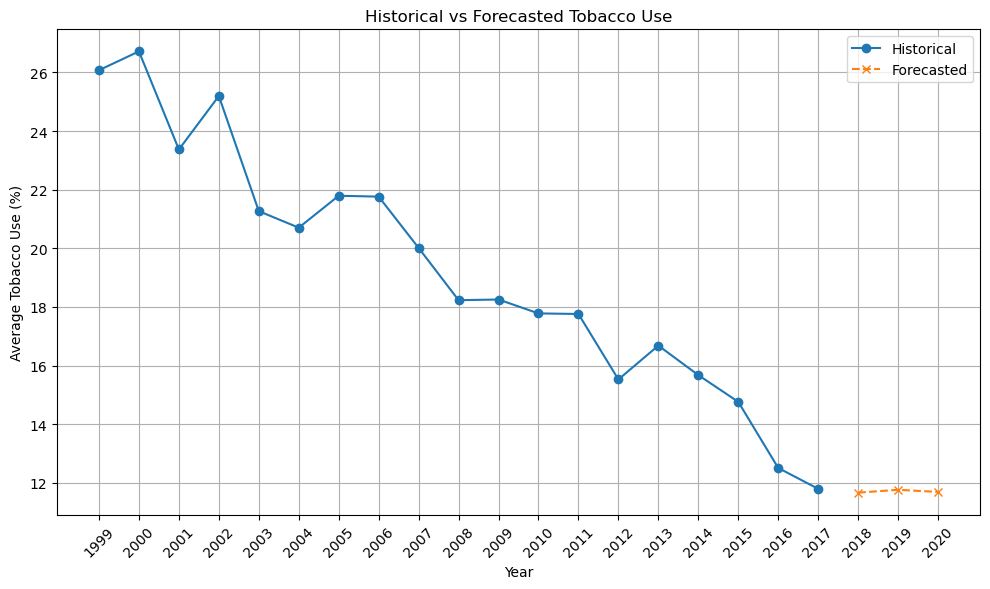

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plot historical data
plt.plot(combined_data['YEAR'][:-3], combined_data['Data_Value'][:-3], label='Historical', marker='o')
# Plot forecasted data
plt.plot(combined_data['YEAR'][-3:], combined_data['Data_Value'][-3:], label='Forecasted', marker='x', linestyle='--')

plt.title('Historical vs Forecasted Tobacco Use')
plt.xlabel('Year')
plt.ylabel('Average Tobacco Use (%)')
plt.legend()
plt.grid(True)
plt.xticks(combined_data['YEAR'], rotation=45)
plt.tight_layout()
plt.show()


Trend: The forecast follows the overall downward trend observed in the historical data, which could suggest that existing interventions or social trends that have been reducing tobacco use are expected to continue having an effect, 

Policy Implications: If this trend is considered alongside policy or public health initiatives, it may suggest that ongoing efforts should be maintained or enhanced to continue the downward trend in youth tobacco use.

## Linear regression